In [2]:
import numpy as np
import matplotlib.pyplot as plt
import torch
from PIL import Image
import os

In [5]:
input_val = torch.load('./data/aerosol_2/val/input_val.pt')
target_val = torch.load('./data/aerosol_2/val/target_val.pt')
nan_val = torch.isnan(target_val)
#target_val = torch.where(nan_val, torch.tensor(0.0), target_val)


In [14]:
nn_pred = torch.load('./data/prediction/aerosol_test_aerosol_val.pt')
nn_mse = 0
for j in range(input_val.shape[0]):
    
    nn_mse += np.nanmean((nn_pred[j,0,0,...].numpy()-target_val[j,0,0,...].numpy())**2) 

In [15]:

nn_2pred = torch.load('./data/prediction/aerosol_2_test_cnn_newdata_aerosol_val.pt')
nn_mse = 0
for j in range(input_val.shape[0]):
    
    nn_mse += np.nanmean((nn_2pred[j,0,0,...].numpy()-target_val[j,0,0,...].numpy())**2) 

In [8]:
pred = np.zeros_like(target_val)
mse = 0
for j in range(input_val.shape[0]):
    pred[j,0,0,...] = np.array(Image.fromarray(input_val[j,0,0,...].numpy()).resize((160,160), Image.BICUBIC))
    mse += np.nanmean((pred[j,0,0,...]-target_val[j,0,0,...].numpy())**2) 

In [12]:
print(nn_mse, mse)

5.712627159256954 5.930169335450046


In [17]:
print(np.sqrt(nn_mse/input_val.shape[0]), np.sqrt(mse/input_val.shape[0]))

0.07564968614573023 0.07700759271299192


In [42]:
print(nn_mse/input_val.shape[0])

0.017164169803145342


In [32]:
nn_pred.mean()

tensor(0.0797)

In [33]:
target_val.mean()

tensor(0.0751)

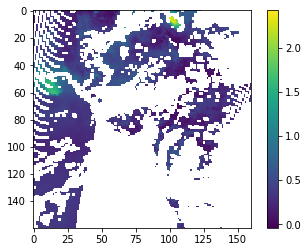

In [3]:
plt.imshow(target_val[100,0,0,...])
plt.colorbar()

In [8]:
lr = np.nanmean(target_val[100,0,0,...], axis)

0.39356604

In [10]:
arr = [np.nan, 1.0]

In [12]:
np.nanmean(arr)

1.0

In [19]:
print(nn_pred.max())

tensor(3.0163)


In [20]:
print(pred.max())

4.1579037


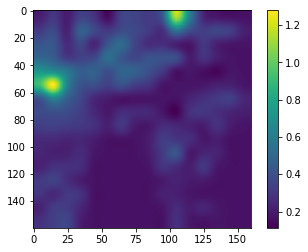

In [9]:
plt.subplot
plt.imshow(pred[100,0,0,...])
plt.colorbar()


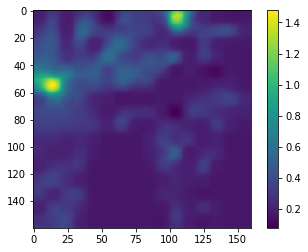

In [13]:
plt.imshow(nn_2pred[100,0,0,...])
plt.colorbar()

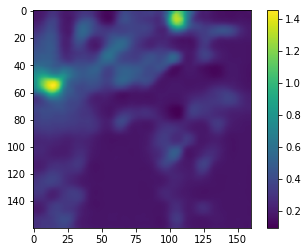

In [7]:
plt.imshow(nn_2pred[100,0,0,...])
plt.colorbar()

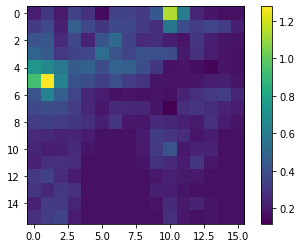

In [18]:
plt.imshow(input_val[100,0,0,...])
plt.colorbar()

In [4]:
arr = np.load('data/target_10.npy')

In [2]:
torch.nanmean(torch.Tensor(arr))

AttributeError: module 'torch' has no attribute 'nanmean'

In [5]:
arr.max()

nan

In [8]:
arr.shape

(160, 160)

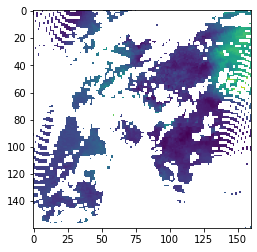

In [11]:
plt.imshow(arr)

In [26]:
#
path = 'data/targets'
fileList = os.listdir(path)
fileList.sort()
ins = []
for file in fileList:
    arr = np.load(path+ '/'+file)
    ins.append(arr)

In [27]:
glob_arr = np.array(ins)
print(glob_arr.shape)

(9993, 160, 160)


In [21]:
fileList

['input_0.npy',
 'input_1.npy',
 'input_10.npy',
 'input_100.npy',
 'input_1000.npy',
 'input_1001.npy',
 'input_1002.npy',
 'input_1003.npy',
 'input_1004.npy',
 'input_1005.npy',
 'input_1006.npy',
 'input_1007.npy',
 'input_1008.npy',
 'input_1009.npy',
 'input_101.npy',
 'input_1010.npy',
 'input_1011.npy',
 'input_1012.npy',
 'input_1013.npy',
 'input_1014.npy',
 'input_1015.npy',
 'input_1016.npy',
 'input_1017.npy',
 'input_1018.npy',
 'input_1019.npy',
 'input_102.npy',
 'input_1020.npy',
 'input_1021.npy',
 'input_1022.npy',
 'input_1023.npy',
 'input_1024.npy',
 'input_1025.npy',
 'input_1026.npy',
 'input_1027.npy',
 'input_1028.npy',
 'input_1029.npy',
 'input_103.npy',
 'input_1030.npy',
 'input_1031.npy',
 'input_1032.npy',
 'input_1033.npy',
 'input_1034.npy',
 'input_1035.npy',
 'input_1036.npy',
 'input_1037.npy',
 'input_1038.npy',
 'input_1039.npy',
 'input_104.npy',
 'input_1040.npy',
 'input_1041.npy',
 'input_1042.npy',
 'input_1043.npy',
 'input_1044.npy',
 'inpu

In [28]:
torch.save(torch.Tensor(glob_arr[:8000,...]).unsqueeze(1).unsqueeze(1),'data/aerosol/train/target_train.pt')

In [29]:
torch.save(torch.Tensor(glob_arr[8000:9000,...]).unsqueeze(1).unsqueeze(1),'data/aerosol/val/target_val.pt')

In [31]:
torch.nanmean(torch.Tensor(ins[0]))

tensor(0.1937)